In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
print(city.head())
ride = pd.read_csv(ride_data_to_load)
print(ride.head())

# Combine the data into a single dataset
complete = pd.merge(ride, city, how="left", on=["city"])
#print(complete.head())


# Display the data table for preview
#print(complete.head())
complete.count()


           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [4]:
# Display the data table for preview
complete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [5]:
city = city.sort_values(by='city', ascending=True).reset_index(drop=True)
ride = ride.sort_values(by='city', ascending=True).reset_index(drop=True)
complete = complete.sort_values(by='city', ascending=True).reset_index(drop=True)


ride.loc[ride["city"]=="Amandaburgh"]
city.head()


,city,driver_count,type
0,Amandaburgh,12,Urban
1,Barajasview,26,Urban
2,Barronchester,11,Suburban
3,Bethanyland,22,Suburban
4,Bradshawfurt,7,Rural


In [6]:
y_axis = ride.groupby(["city"]).mean()
y_axis
city["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

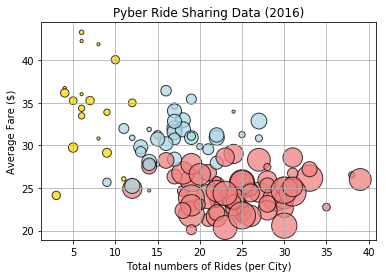

In [7]:
#Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between 
#four key variables:

#* Average Fare ($) Per City ======Y AXIS
#* Total Number of Rides Per City ====== X AXIS
#* Total Number of Drivers Per City ======Z AXIS
#* City Type (Urban, Suburban, Rural)

# Obtain the x and y coordinates for each of the three city types
x_limit = ride["city"].value_counts().max()
x_limit = x_limit + 5

x_axis = ride.groupby(["city"]).count()["ride_id"]
y_axis = ride.groupby(["city"]).mean()["fare"]
z_axis = city["driver_count"]

#############################################################3
#without the legend it is very easy

types = city["type"]
colors = []

for typ in types:
    if typ == "Urban":
        colors.append("lightcoral")
    elif typ == "Suburban":
        colors.append("lightblue")
    else:
        colors.append("gold")

plt.scatter(x_axis, y_axis, marker="o", facecolors=colors , edgecolors="black",
           s=z_axis*10, alpha=0.75)

# Build the scatter plots for each city types

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total numbers of Rides (per City)")
plt.ylabel("Average Fare ($)")
# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/cityscatter.png")
#plt.legend(plt,("lightcoral","lightblue","gold"), loc="best", title="City Types")

plt.grid()
plt.show()

In [8]:
types = city["type"]

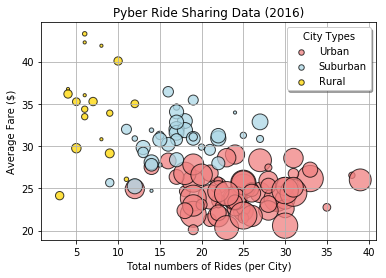

In [12]:
types = city["type"]

x_axis1 = []
y_axis1 = []
z_axis1 = []
x_axis2 = []
y_axis2 = []
z_axis2 = []
x_axis3 = []
y_axis3 = []
z_axis3 = []


for i in range(len(types)):
    if types[i] == "Urban":
        x_axis1.append(x_axis[i]) 
        y_axis1.append(y_axis[i])
        z_axis1.append(z_axis[i]*10)
    elif types[i] == "Suburban":
        x_axis2.append(x_axis[i]) 
        y_axis2.append(y_axis[i])
        z_axis2.append(z_axis[i]*10)
    else:
        x_axis3.append(x_axis[i]) 
        y_axis3.append(y_axis[i])
        z_axis3.append(z_axis[i]*10)

urban = plt.scatter(x_axis1, y_axis1, marker="o", facecolors="lightcoral" , edgecolors="black", 
                      s=z_axis1 , alpha=0.75, label="Urban")
suburban = plt.scatter(x_axis2, y_axis2, marker="o", facecolors="lightblue" , edgecolors="black", 
                       s=z_axis2, alpha=0.75, label="Suburban")
rural = plt.scatter(x_axis3, y_axis3, marker="o", facecolors="gold" , edgecolors="black", 
                        s=z_axis3, alpha=0.75, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total numbers of Rides (per City)")
plt.ylabel("Average Fare ($)")

lgnd = plt.legend(loc="best", shadow=True, title="City Types", fancybox=True)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
#plt.legend()
plt.grid()

# Show plot
plt.show()

In [13]:
urban=complete(complete.type == "Urban")
urban.head()

TypeError: 'DataFrame' object is not callable

In [101]:
plt.show()

## Total Fares by City Type

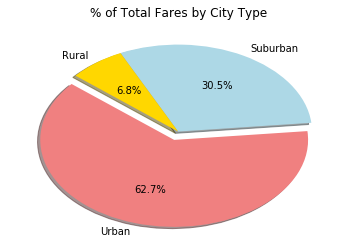

In [132]:
# Calculate Type Percents
urban_total_fare = complete.loc[complete["type"] == "Urban", "fare"].sum()
suburban_total_fare = complete.loc[complete["type"] == "Suburban","fare"].sum()
rural_total_fare = complete.loc[complete["type"] == "Rural","fare"].sum()
total_fare = complete["fare"].sum()

urban_ratio = urban_total_fare/total_fare*100
suburban_ratio = suburban_total_fare/total_fare*100
rural_ratio = rural_total_fare/total_fare*100

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_ratio, suburban_ratio, rural_ratio]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
#plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyBerPie1.png")
plt.title("% of Total Fares by City Type")
plt.show()

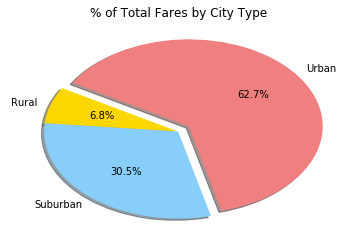

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

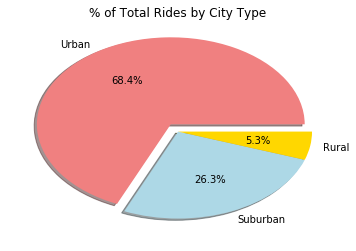

In [136]:
# Calculate Ride Percents
urban_total_ride = complete.loc[complete["type"] == "Urban","ride_id"].count()
suburban_total_ride = complete.loc[complete["type"] == "Suburban","ride_id"].count()
rural_total_ride = complete.loc[complete["type"] == "Rural","ride_id"].count()
total_ride = complete["ride_id"].count()

urban_ratio = urban_total_ride/total_ride*100
suburban_ratio = suburban_total_ride/total_ride*100
rural_ratio = rural_total_ride/total_ride*100

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_ratio, suburban_ratio, rural_ratio]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)
# Save Figure
#plt.axis("equal")
# Save figure
plt.savefig("../Images/PyBerPie2.png")
plt.title("% of Total Rides by City Type")
plt.show()


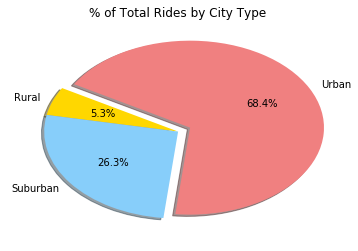

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

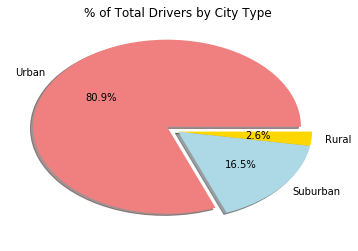

In [139]:
# Calculate Driver Percents
urban_total_driver = city.loc[city["type"] == "Urban","driver_count"].sum()
suburban_total_driver = city.loc[city["type"] == "Suburban","driver_count"].sum()
rural_total_driver = city.loc[city["type"] == "Rural","driver_count"].sum()
total_driver = city["driver_count"].sum()

urban_ratio = urban_total_driver/total_driver*100
suburban_ratio = suburban_total_driver/total_driver*100
rural_ratio = rural_total_driver/total_driver*100
# Build Pie Charts
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_ratio, suburban_ratio, rural_ratio]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)
# Save Figure
#plt.axis("equal")
# Save figure
plt.savefig("../Images/PyBerPie3.png")
plt.title("% of Total Drivers by City Type")
plt.show()

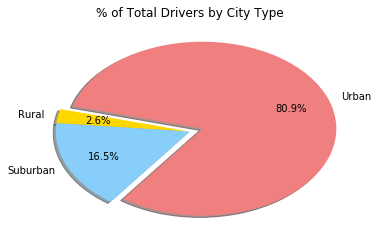

In [6]:
# Show Figure
plt.show()